In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [39]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Clustering focusing on the 'Kingdom' feature

In [41]:
target_train = training.loc[:,"Kingdom"]

In [42]:
training = training.iloc[:, 6:]

In [43]:
target_test = test.loc[:, "Kingdom"]

In [44]:
test = test.iloc[:, 6:]

In [45]:
training

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,0.02094,0.01885,0.01226,...,0.00643,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030
1,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,0.02992,0.01352,0.03370,...,0.00268,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050
2,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,0.00278,0.03250,0.01768,...,0.00114,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086
3,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,0.02834,0.02508,0.02611,...,0.01177,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063
4,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,0.01408,0.03873,0.03873,...,0.00000,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,0.02289,0.02959,0.00614,0.02680,0.01452,0.02178,0.00558,0.01228,0.02401,0.01954,...,0.00558,0.00893,0.01173,0.03071,0.01954,0.01787,0.02848,0.03127,0.00112,0.00000
10418,0.02532,0.01557,0.00878,0.01185,0.01160,0.02654,0.00979,0.02313,0.01773,0.01977,...,0.00477,0.01274,0.01008,0.02070,0.00726,0.02388,0.02233,0.01814,0.00025,0.00038
10419,0.01614,0.02618,0.00131,0.01003,0.02661,0.01658,0.00218,0.04712,0.01920,0.03054,...,0.01702,0.00175,0.00567,0.02487,0.00000,0.02661,0.02618,0.01353,0.00000,0.00349
10420,0.00196,0.01761,0.04501,0.03131,0.02544,0.00978,0.01761,0.00783,0.04305,0.00587,...,0.00391,0.01566,0.00391,0.02348,0.01957,0.03523,0.00978,0.00196,0.00000,0.00196


In [46]:
test

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGA,CGG,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.00959,0.01359,0.01584,0.01312,0.02491,0.02457,0.01885,0.01269,0.01319,0.03672,...,0.00354,0.00121,0.00709,0.02980,0.04135,0.02608,0.03877,0.01183,0.00061,0.00117
1,0.01223,0.03447,0.00508,0.01811,0.01176,0.02335,0.00413,0.02017,0.01334,0.03161,...,0.00763,0.00524,0.01001,0.02621,0.03368,0.02303,0.03066,0.03479,0.00064,0.00064
2,0.01014,0.03014,0.00145,0.01275,0.01420,0.02521,0.00261,0.01101,0.02492,0.03796,...,0.00551,0.00058,0.00174,0.02753,0.02695,0.00637,0.01826,0.03216,0.00116,0.00029
3,0.03551,0.02892,0.00155,0.01117,0.01224,0.02475,0.00511,0.02233,0.01392,0.03101,...,0.00303,0.00451,0.00356,0.02865,0.02401,0.01594,0.03390,0.01628,0.00108,0.00047
4,0.01662,0.01400,0.02800,0.03412,0.01312,0.02625,0.02100,0.01137,0.03412,0.01750,...,0.01662,0.00175,0.01837,0.03062,0.02362,0.03150,0.01575,0.02625,0.00087,0.00525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,0.00694,0.02021,0.00993,0.01316,0.01435,0.01973,0.00921,0.03720,0.01794,0.02607,...,0.00431,0.00502,0.01100,0.02213,0.02249,0.03744,0.03373,0.01411,0.00060,0.00167
2602,0.01400,0.02160,0.01327,0.02326,0.01459,0.00924,0.00480,0.02757,0.02659,0.02615,...,0.00361,0.00768,0.00333,0.03314,0.02080,0.04392,0.02105,0.02458,0.00040,0.00065
2603,0.00264,0.05079,0.02243,0.00132,0.03034,0.07190,0.04156,0.00264,0.03958,0.05079,...,0.01583,0.00264,0.00000,0.00660,0.02243,0.01121,0.00264,0.01451,0.00000,0.02375
2604,0.00000,0.00502,0.05021,0.00837,0.01841,0.01757,0.00586,0.00167,0.03849,0.00586,...,0.00000,0.00000,0.00167,0.04770,0.05523,0.08703,0.00418,0.00000,0.00084,0.00000


In [47]:
target_train

0        vrl
1        inv
2        bct
3        bct
4        vrt
        ... 
10417    pln
10418    vrl
10419    bct
10420    pln
10421    pln
Name: Kingdom, Length: 10422, dtype: object

In [48]:
target_test

0       bct
1       inv
2       pln
3       pln
4       pln
       ... 
2601    mam
2602    bct
2603    vrt
2604    bct
2605    mam
Name: Kingdom, Length: 2606, dtype: object

In [ ]:
# sto usando solo il training per ora, credo che il test vada usato solo dopo

In [49]:
X = training
y = target_train

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

### Function to plot the dendrogram

In [51]:
def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # this block Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.metric)
            
    #in OUR CASE we are starting here
    #This block checks if the n_clusters keyword argument is provided, if yes it calcualtes the threshold for coloring
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-5 #select the height to cut, Z[-n_clusters, 2] retrieves the distance of the merge that results in exactly n_clusters clusters. This is because Z is sorted by merge order, so Z[-n_clusters] gives the n_clusters-th merge from the end (i.e., the merge that leaves exactly n_clusters clusters).
        #kwargs['color_threshold'] = None
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram, with keyword arguments
    ddata = dendrogram(Z,ax=ax, **kwargs)
    
    # This block annotates nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']): #x, y coordinates and color
        x = 0.5 * sum(i[1:3]) #position where to plot on x
        y = d[1]  #position where to plot on x
        nid = np.where(Z[:,2] == y)[0][0] #This is the third column of the linkage matrix Z, which contains the distances between clusters at each merge.

        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),# The text to be annotated. nid is the index of the merge, and Z.shape[0] is the number of merges. Subtracting these gives the node identifier.
                         textcoords='offset points',
                         va='top', ha='center')
    #This block draws a horizontal line at the color_threshold height to indicate the cut point for clusters.
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax
   

## Functions to evaluate the clusters obtained

In [57]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize 

def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])#matrix that contains zeros
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i)#position of true values, all inside same cluster, contains the indices of all points that belong to the current cluster i.
        # Compute all the possible combinations combinations of these indices
        idx = np.meshgrid(sample_idx, sample_idx)
        mat[idx[0], idx[1]] = 1
        
    return mat

def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric=metric)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    # Normalize distances in [0, 1] and compute the similarity
    sim_mat = 1 - (dist_mat-min_dist)/(max_dist-min_dist)
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    
    # Note: we can eventually remove duplicate values
    # only the upper/lower triangular matrix
    # triuidx = np.triu_indices(y_pred.shape[0], k=1)
    # inc = inc[triuidx]
    # sim = sim[triuidx]
    
    inc = normalize(inc.reshape(1,-1))#Flattens the incidence matrix into a 1D array (row vector).
    sim = normalize(sim.reshape(1,-1))#Computes the dot product of the normalized incidence and similarity matrices. This gives a single scalar value (since both are now row vectors).
    corr = inc @ sim.T #[1, NF] * [NF, 1] --> [1,1]
    return corr[0,0]   

### Comparison between different agglomerative methods
### Centroid is not considered because not implemented in the API version and we are interested in y_predict (available only using the API) to compare the methods

Performance using [single] method is 0.9908999751091847. Random performance is 0.3137926618454324
Performance using [average] method is 0.9903687626684001. Random performance is 0.3136493739192069
Performance using [complete] method is 0.6516600830230881. Random performance is 0.3138944107970516
Performance using [ward] method is 0.42964279553479634. Random performance is 0.31386527764657235


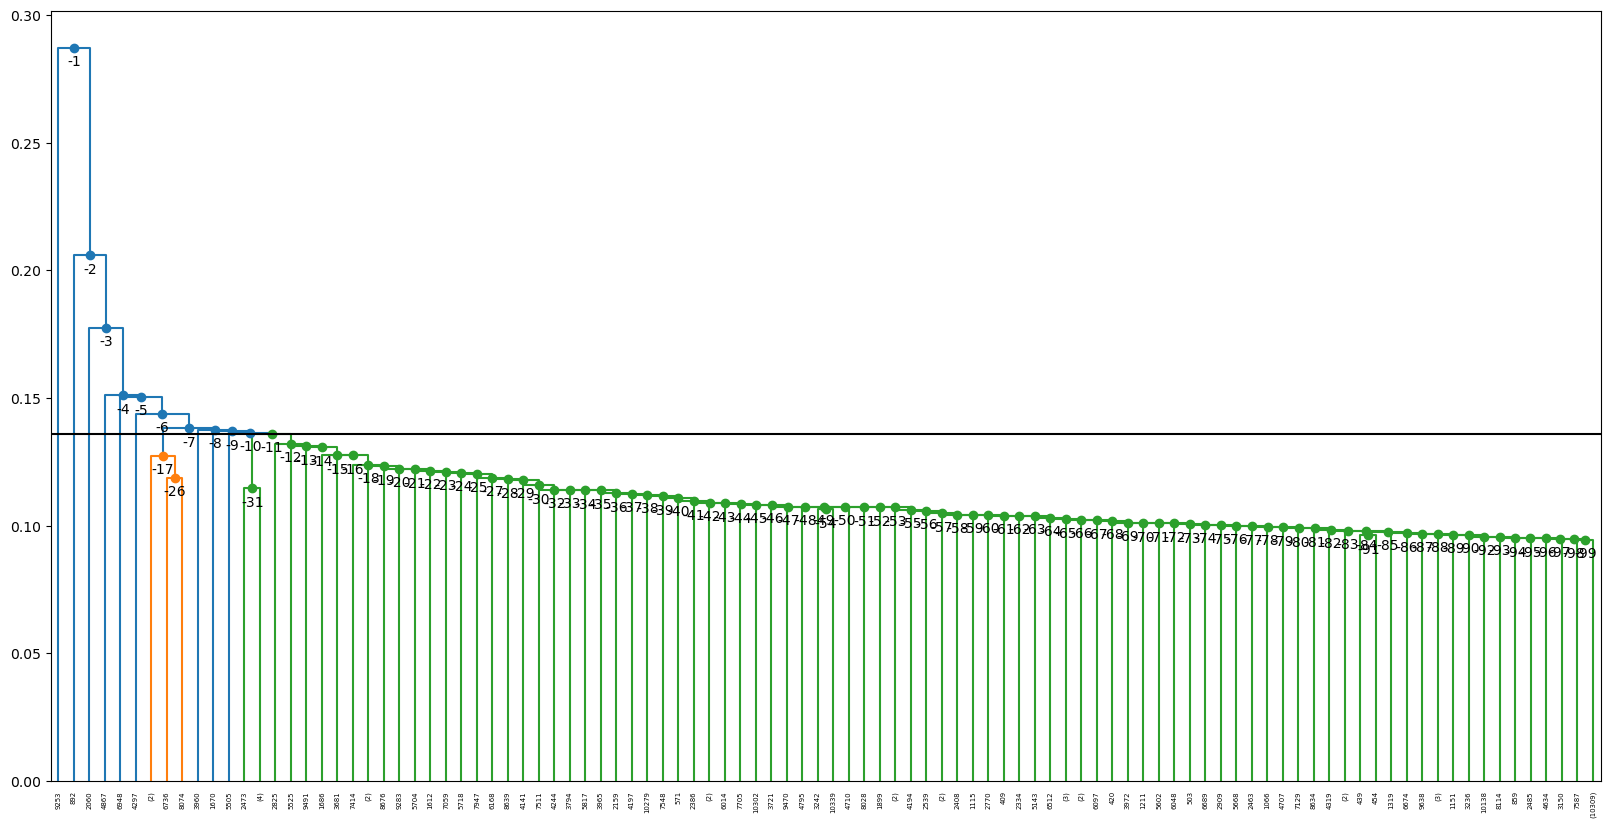

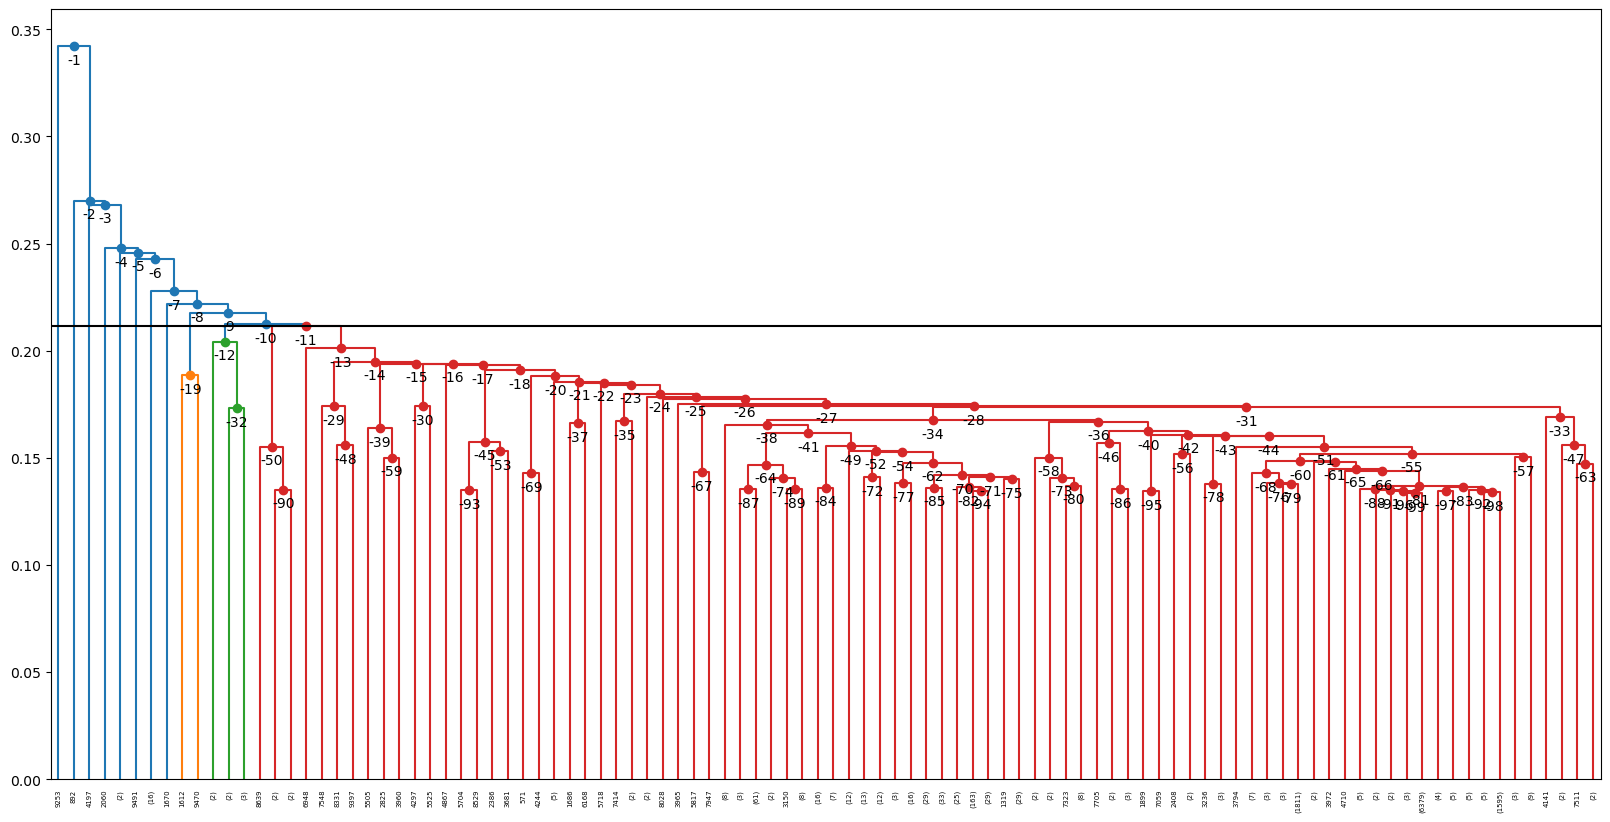

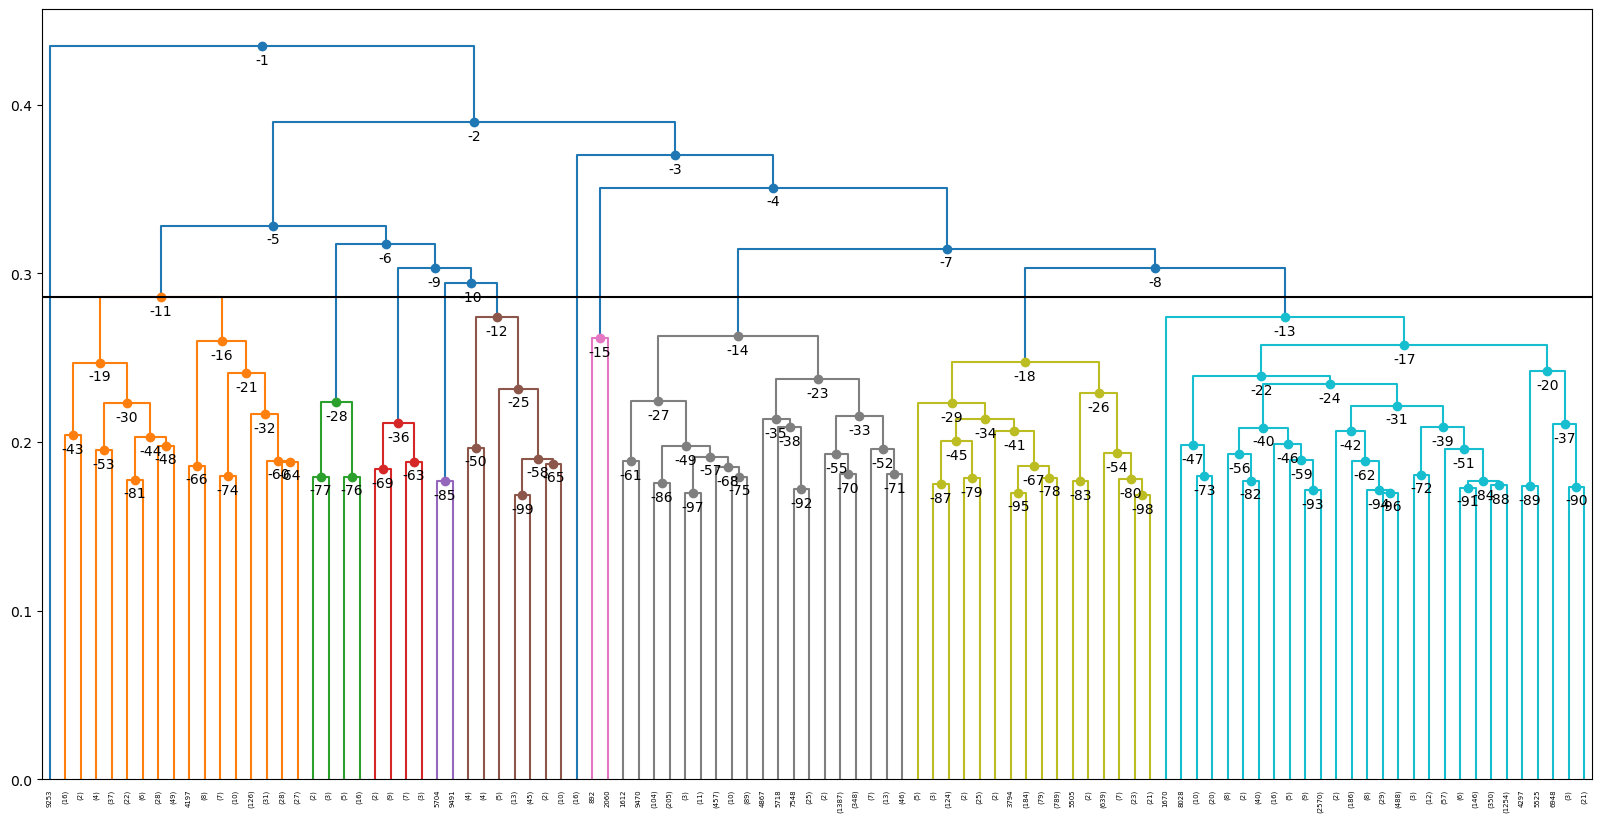

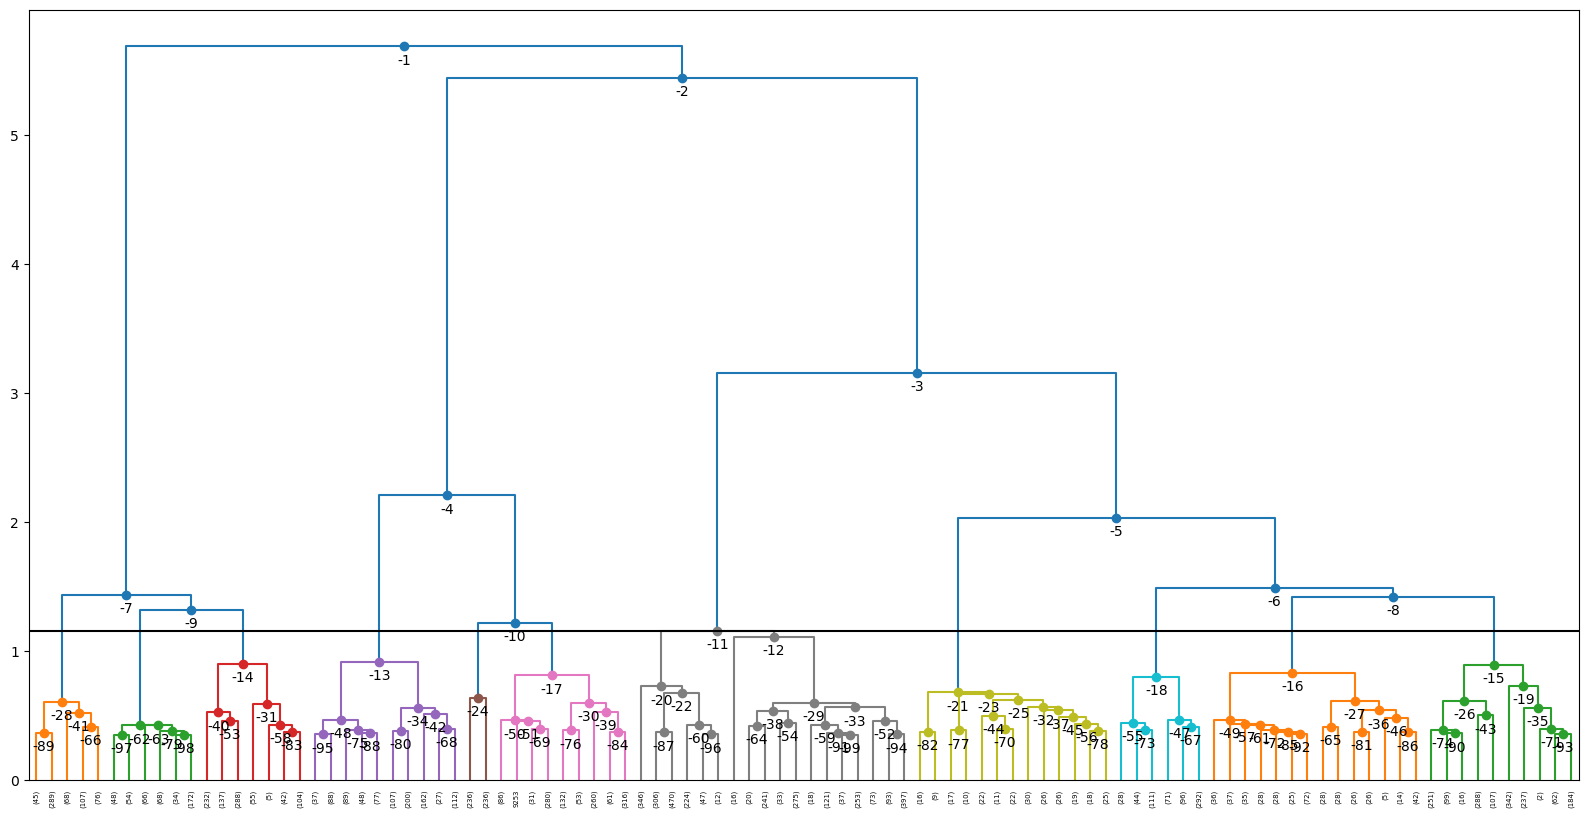

In [63]:
%matplotlib inline

methods = ['single', 'average', 'complete', 'ward']
distance_threshold=None

prediction_dict = {'single':None, 'average': None, 'complete':None, 'ward':None}

for method in methods:
    model = AgglomerativeClustering(n_clusters=11, linkage=method,
                                    metric='euclidean')

    y_predict = model.fit_predict(X)
    corr = correlation(X, y_predict, 'euclidean')
    y_rand = np.random.randint(0,10, X.shape[0])
    rand_corr = correlation(X, y_rand, 'euclidean')
    print("Performance using [{}] method is {}. Random performance is {}".format(method, corr, rand_corr))
    
    prediction_dict[method] = y_predict
    
    plot_dendrogram(model=model, X=X, truncate_mode='lastp', p=100, 
                    n_clusters=11, 
                    color_threshold=distance_threshold)


### Function to plot the heatmap of the similarity matrix

In [60]:
#This function sorts a similarity matrix based on the cluster labels provided in y_pred.
def sorted_mat(sim, y_pred):
    idx_sorted = np.argsort(y_pred)#sort the array y_pred in ascending order. 
    # Sort the rows
    sim = sim[idx_sorted, :]
    # Sort the columns
    sim = sim[:, idx_sorted]
    
    return sim

#plotting the heatmap
def plot_sorted_mat(sim, y_pred):
    sim = sorted_mat(sim, y_pred)
    
    fig, ax = plt.subplots(figsize=(40,30))  
    ax = sns.heatmap(sim, ax=ax)
    # Remove ruler (ticks)
    ax.set_yticks([]) 
    ax.set_xticks([])

In [ ]:
for method,y_predict in prediction_dict.items():
    sim = similarity_mat(X, metric='euclidean')    
    plot_sorted_mat(sim, y_predict)

In [ ]:
# Plot the sorted indicence matrix and compare it with the similarity one
# Try to select different distances!
inc = incidence_mat(y_predict)        #vedendo quanto ci ha messo sopra non l'ho nemmeno runnato...
# plot sorted ...
plot_sorted_mat(inc, y_predict)

#this is like how the ideal matrix should look like...

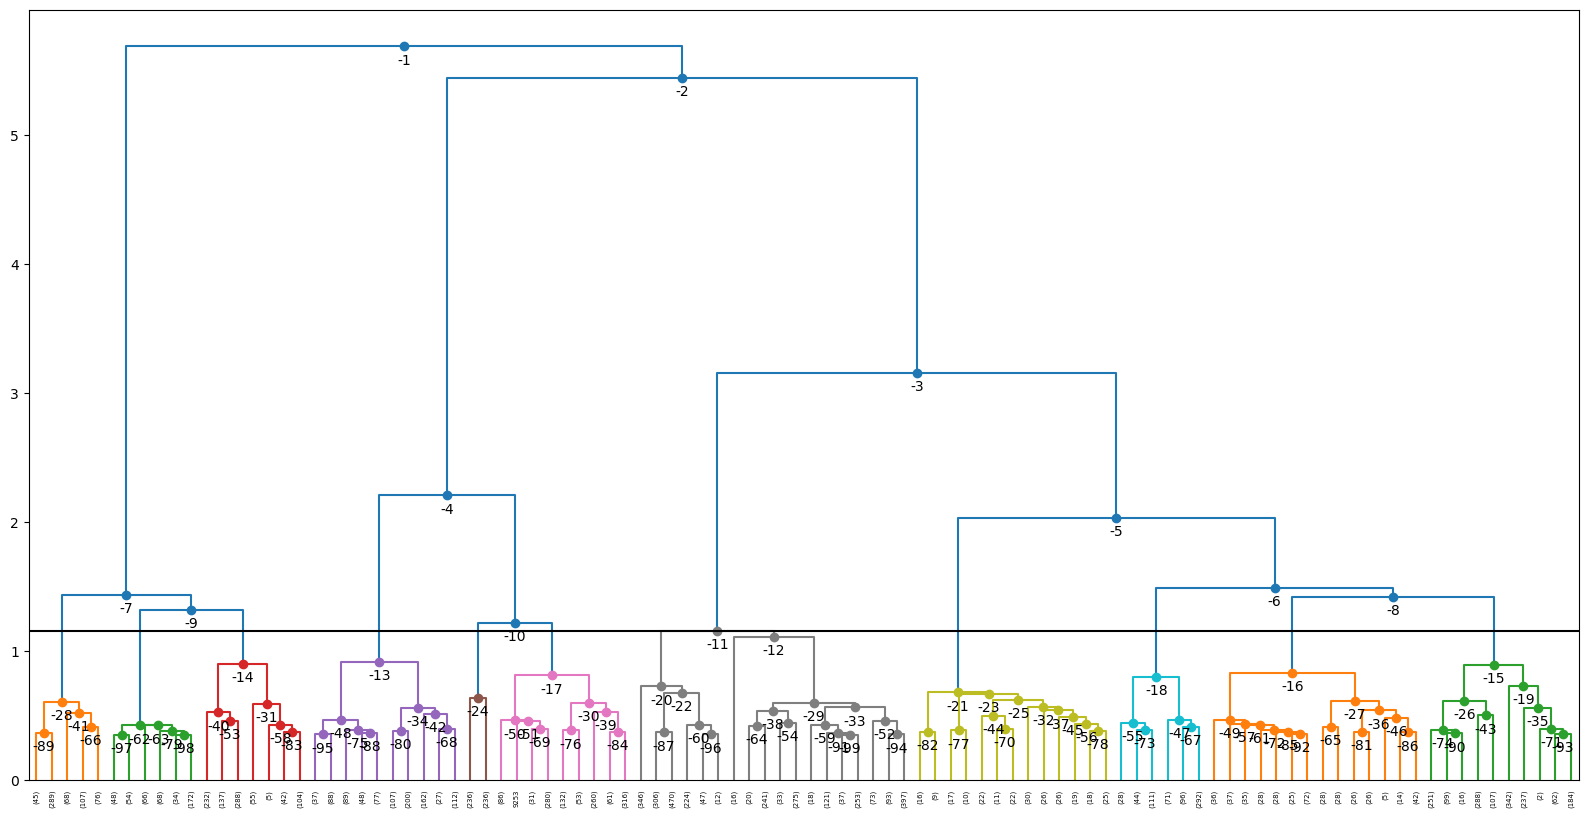

In [54]:
Z = linkage(X, metric='euclidean', method='ward')
fig, ax = plot_dendrogram(Z=Z, X=X, truncate_mode='lastp',   
                          p=100, n_clusters=11)

In [51]:
def wss(X, y_pred, metric):
    # Compute the incidence matrix
    inc = incidence_mat(y_pred)
    # Compute the distances between each pair of nodes
    dist_mat = pairwise_distances(X, metric=metric)
    # Use the incidence matrix to select only the 
    # distances between pair of nodes in the same cluster
    dist_mat = dist_mat*inc
    # Select the lower/upper triangular part of the matrix
    # excluding the diagonal k
    triu_idx = np.triu_indices(X.shape[0], k=1)
    
    #select point that you want, compute the square and sum it
    wss = (dist_mat[triu_idx]**2).sum()
    
    return wss

def bss(X, y_pred, metric):
    # Compute the incidence matrix
    inc = incidence_mat(y_pred)
    # Compute the distances between each pair of nodes
    dist_mat = pairwise_distances(X, metric=metric)
    # Use the incidence matrix to select only the 
    # distances between pair of nodes in different clusters
    dist_mat = dist_mat*(1-inc)
    # Select the lower/upper triangular part of the matrix
    # excluding the diagonal
    triu_idx = np.triu_indices(X.shape[0], k=1)
    
    bss = (dist_mat[triu_idx]**2).sum()
    
    return bss

print("WSS", wss(X, y_predict, 'euclidean'))
print("BSS", bss(X, y_predict, 'euclidean'))

WSS 69015.23136230893
BSS 883387.8809825699


In [ ]:
from sklearn.metrics import silhouette_score

wss_list, bss_list, sil_list = [], [], []
clus_list = list(range(1, 15))

for nc in clus_list:
    model = AgglomerativeClustering(n_clusters=nc,
                                    metric='euclidean', 
                                    linkage='ward')

    y_predict = model.fit_predict(X)
    
    wss_list.append(wss(X, y_predict, 'euclidean'))
    bss_list.append(bss(X, y_predict, 'euclidean'))
    #silhouette score is not defined for a single cluster
    if nc > 1:
        sil_list.append(silhouette_score(X, y_predict, metric='euclidean'))
    
plt.plot(clus_list, wss_list, label='WSS')
plt.plot(clus_list, bss_list, label='BSS')
plt.legend()
plt.show()

plt.plot(clus_list[1:], sil_list, label='Average silhuette score')
plt.legend()




# clustering on DNAtype

In [57]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [58]:
target_train = training.loc[:,"DNAtype"]

In [59]:
training = training.iloc[:, 6:]

In [60]:
target_test = test.loc[:, "Kingdom"]

In [61]:
test = test.iloc[:, 6:]

In [62]:
X = training
y = target_train

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [64]:
# Generate the linkage matrix
Z = linkage(X, method='ward', metric='euclidean')
Z.shape

(10421, 4)

In [65]:
def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # this block Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
            
    #in OUR CASE we are starting here
    #This block checks if the n_clusters keyword argument is provided, if yes it calcualtes the threshold for coloring
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-5 #select the height to cut, Z[-n_clusters, 2] retrieves the distance of the merge that results in exactly n_clusters clusters. This is because Z is sorted by merge order, so Z[-n_clusters] gives the n_clusters-th merge from the end (i.e., the merge that leaves exactly n_clusters clusters).
        #kwargs['color_threshold'] = None
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram, with keyword arguments
    ddata = dendrogram(Z,ax=ax, **kwargs)
    
    # This block annotates nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']): #x, y coordinates and color
        x = 0.5 * sum(i[1:3]) #position where to plot on x
        y = d[1]  #position where to plot on x
        nid = np.where(Z[:,2] == y)[0][0] #This is the third column of the linkage matrix Z, which contains the distances between clusters at each merge.

        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),# The text to be annotated. nid is the index of the merge, and Z.shape[0] is the number of merges. Subtracting these gives the node identifier.
                         textcoords='offset points',
                         va='top', ha='center')
    #This block draws a horizontal line at the color_threshold height to indicate the cut point for clusters.
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax
   

(<Figure size 2000x1000 with 1 Axes>, <Axes: >)

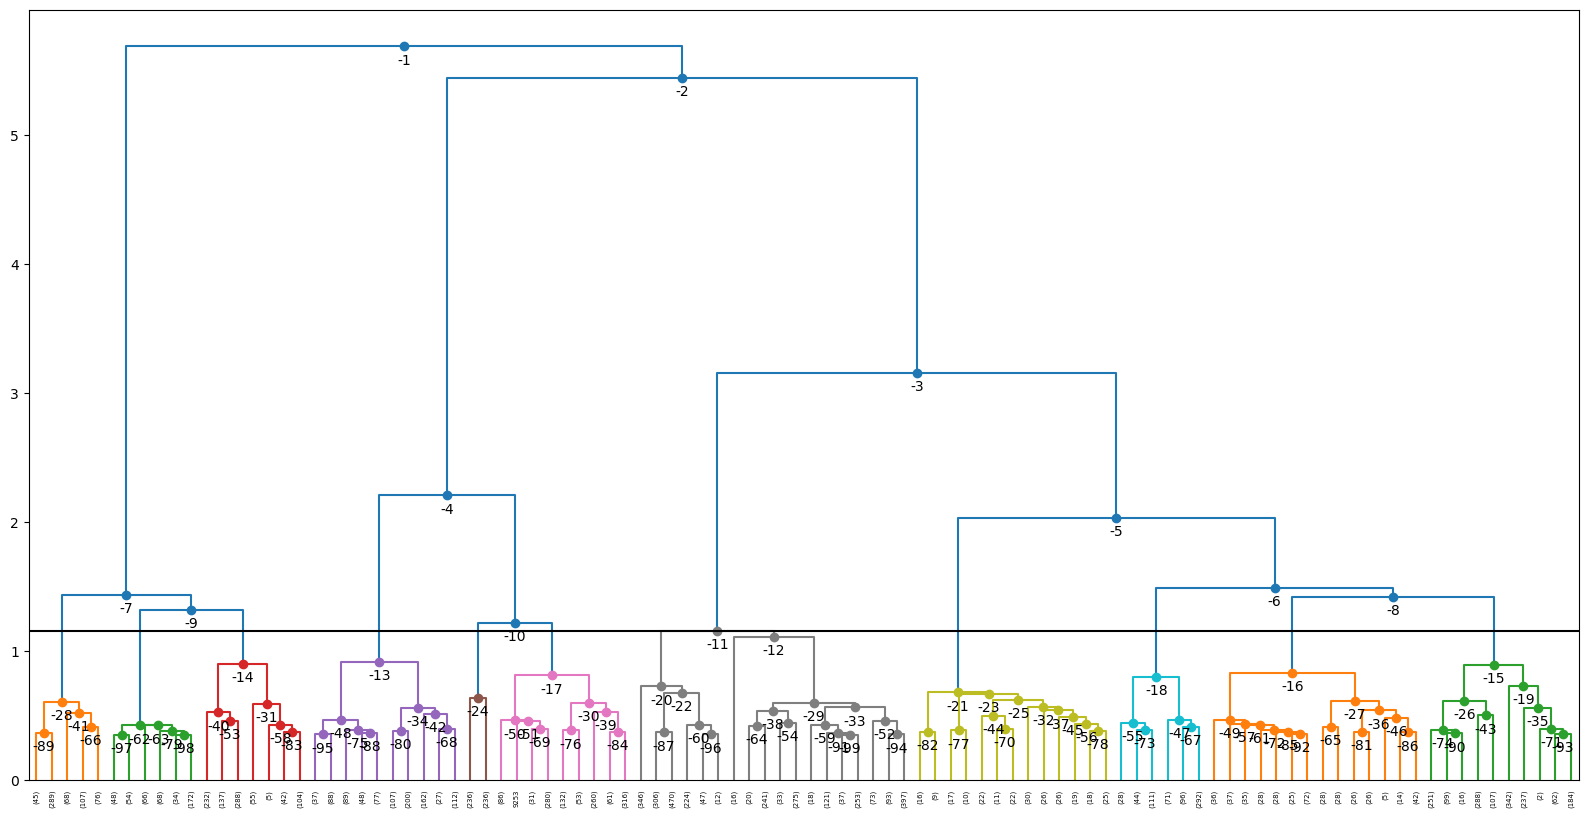

In [66]:
# Plot the dendrogram, showing ony the ast 100 merges
# and cutting the dendrogram so that we obtain 11 clusters
%matplotlib inline
plot_dendrogram(Z=Z, X=X,
                truncate_mode='lastp', 
                p=100, n_clusters=11)    


In [67]:
from sklearn.cluster import AgglomerativeClustering
distance_threshold=None#one or another, we put default n_clusters
%matplotlib inline
n_clusters=11

model = AgglomerativeClustering(   n_clusters=n_clusters, metric='euclidean', linkage='ward')

y_predict = model.fit_predict(X)


In [68]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize 


#incidence matrix: computing all 0 matrix to do the matrix with the right dimension, poi inizio a mettere 1 sulla diagonale e poi 1 anche dove ci sono campioni dello stesso cluster, tutti gli altri rimangono 0

def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])#matrix that contains zeros
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i)#position of true values, all inside same cluster, contains the indices of all points that belong to the current cluster i.
        # Compute all the possible combinations combinations of these indices
        idx = np.meshgrid(sample_idx, sample_idx)
        mat[idx[0], idx[1]] = 1
        
    return mat

def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric=metric)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    # Normalize distances in [0, 1] and compute the similarity
    sim_mat = 1 - (dist_mat-min_dist)/(max_dist-min_dist)
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    
    # Note: we can eventually remove duplicate values
    # only the upper/lower triangular matrix
    # triuidx = np.triu_indices(y_pred.shape[0], k=1)
    # inc = inc[triuidx]
    # sim = sim[triuidx]
    
    inc = normalize(inc.reshape(1,-1))#Flattens the incidence matrix into a 1D array (row vector).
    sim = normalize(sim.reshape(1,-1))#Computes the dot product of the normalized incidence and similarity matrices. This gives a single scalar value (since both are now row vectors).
    corr = inc @ sim.T #[1, NF] * [NF, 1] --> [1,1]
    return corr[0,0]   

In [69]:
correlation(X, y_predict, 'euclidean')   #better than random but not so good

0.4296427955348185

In [70]:
y_rand = np.random.randint(0,10, X.shape[0])
correlation(X, y_rand, 'euclidean')

0.3137900693740603

In [71]:
x=np.array([1,2,0,4,6])
idx=np.argsort(x)
print(idx)
print(x[idx])

[2 0 1 3 4]
[0 1 2 4 6]


In [72]:
#This function sorts a similarity matrix based on the cluster labels provided in y_pred.
def sorted_mat(sim, y_pred):
    idx_sorted = np.argsort(y_pred)#sort the array y_pred in ascending order. 
    # Sort the rows
    sim = sim[idx_sorted, :]
    # Sort the columns
    sim = sim[:, idx_sorted]
    
    return sim

#plotting the heatmap
def plot_sorted_mat(sim, y_pred):
    sim = sorted_mat(sim, y_pred)
    
    fig, ax = plt.subplots(figsize=(40,30))  
    ax = sns.heatmap(sim, ax=ax)
    # Remove ruler (ticks)
    ax.set_yticks([]) 
    ax.set_xticks([])

In [50]:
# Try to select different distances!
sim = similarity_mat(X, metric='euclidean')    #ci stava mettendo troppo...
# plot sorted ...
plot_sorted_mat(sim, y_predict)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021CCEB8A160> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
# Plot the sorted indicence matrix and compare it with the similarity one
# Try to select different distances!
inc = incidence_mat(y_predict)        #vedendo quanto ci ha messo sopra non l'ho nemmeno runnato...
# plot sorted ...
plot_sorted_mat(inc, y_predict)

#this is like how the ideal matrix should look like...

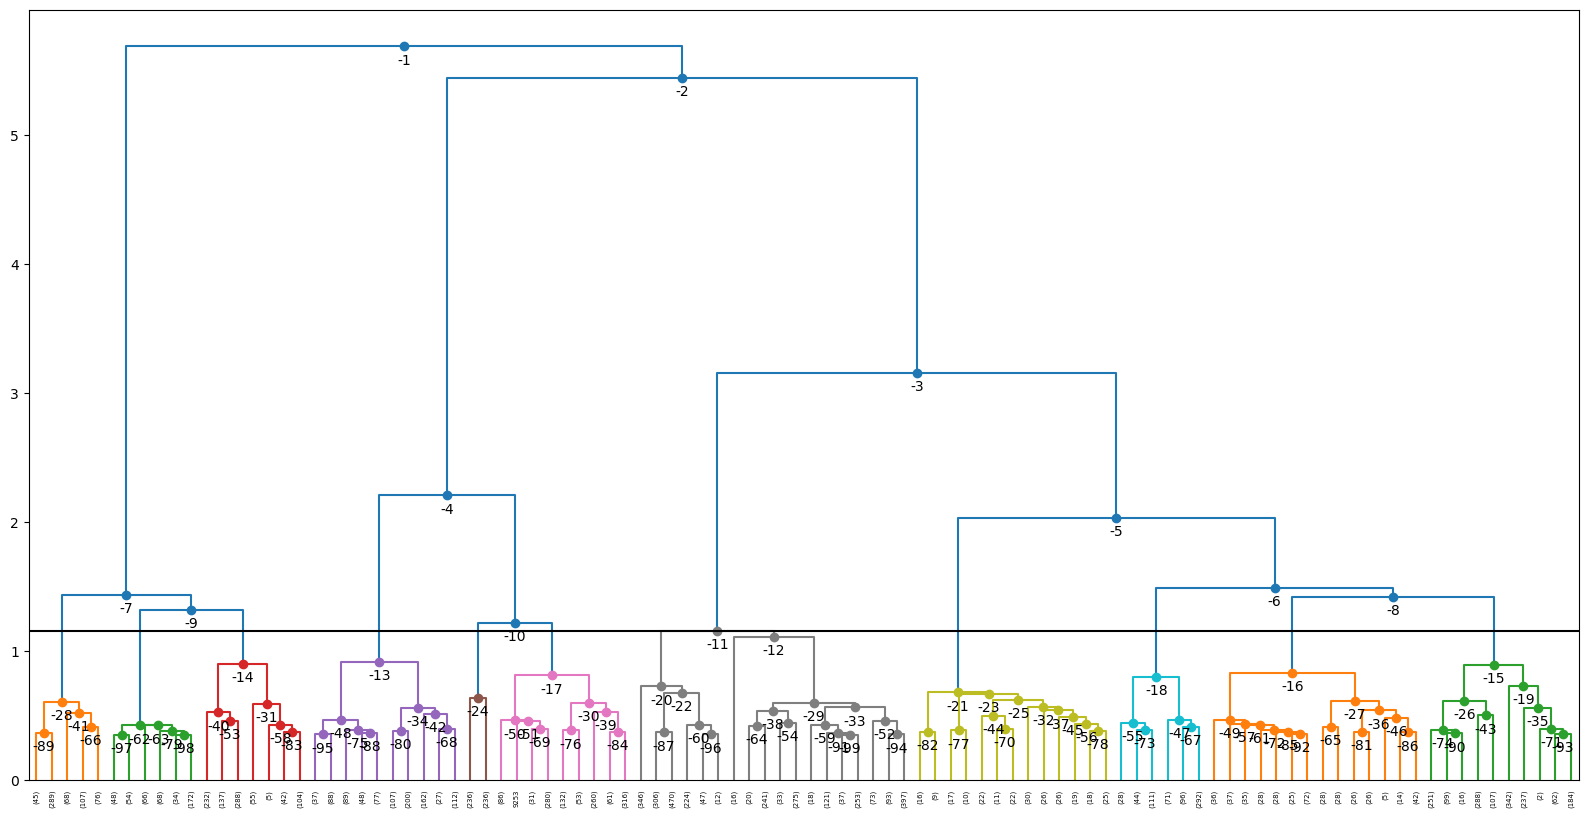

In [73]:
Z = linkage(X, metric='euclidean', method='ward')
fig, ax = plot_dendrogram(Z=Z, X=X, truncate_mode='lastp',   
                          p=100, n_clusters=11)

In [74]:
def wss(X, y_pred, metric):
    # Compute the incidence matrix
    inc = incidence_mat(y_pred)
    # Compute the distances between each pair of nodes
    dist_mat = pairwise_distances(X, metric=metric)
    # Use the incidence matrix to select only the 
    # distances between pair of nodes in the same cluster
    dist_mat = dist_mat*inc
    # Select the lower/upper triangular part of the matrix
    # excluding the diagonal k
    triu_idx = np.triu_indices(X.shape[0], k=1)
    
    #select point that you want, compute the square and sum it
    wss = (dist_mat[triu_idx]**2).sum()
    
    return wss

def bss(X, y_pred, metric):
    # Compute the incidence matrix
    inc = incidence_mat(y_pred)
    # Compute the distances between each pair of nodes
    dist_mat = pairwise_distances(X, metric=metric)
    # Use the incidence matrix to select only the 
    # distances between pair of nodes in different clusters
    dist_mat = dist_mat*(1-inc)
    # Select the lower/upper triangular part of the matrix
    # excluding the diagonal
    triu_idx = np.triu_indices(X.shape[0], k=1)
    
    bss = (dist_mat[triu_idx]**2).sum()
    
    return bss

print("WSS", wss(X, y_predict, 'euclidean'))
print("BSS", bss(X, y_predict, 'euclidean'))

WSS 63674.43509506104
BSS 888728.6772498179


In [75]:
from sklearn.metrics import silhouette_score

wss_list, bss_list, sil_list = [], [], []
clus_list = list(range(1, 15))

for nc in clus_list:
    model = AgglomerativeClustering(n_clusters=nc,
                                    metric='euclidean', 
                                    linkage='ward')

    y_predict = model.fit_predict(X)
    
    wss_list.append(wss(X, y_predict, 'euclidean'))
    bss_list.append(bss(X, y_predict, 'euclidean'))
    #silhouette score is not defined for a single cluster
    if nc > 1:
        sil_list.append(silhouette_score(X, y_predict, metric='euclidean'))
    
plt.plot(clus_list, wss_list, label='WSS')
plt.plot(clus_list, bss_list, label='BSS')
plt.legend()
plt.show()

plt.plot(clus_list[1:], sil_list, label='Average silhuette score')
plt.legend()




KeyboardInterrupt: 